In [1]:
import pandas as pd
path = 'DataForThai.csv'
df = pd.read_csv(path)

In [53]:
df

Date  Confirmed  Deaths  Recovered  daily_new_patient  \
0   2020-01-22        2.0     0.0          0                NaN   
1   2020-01-23        3.0     0.0          0                1.0   
2   2020-01-24        5.0     0.0          0                2.0   
3   2020-01-25        7.0     0.0          0                2.0   
4   2020-01-26        8.0     0.0          2                1.0   
..         ...        ...     ...        ...                ...   
85  2020-04-16     2672.0    46.0       1593               29.0   
86  2020-04-17     2700.0    47.0       1689               28.0   
87  2020-04-18     2733.0    47.0       1787               33.0   
88  2020-04-19     2765.0    47.0       1928               32.0   
89  2020-04-20     2792.0    47.0       1999               27.0   

    daily_new_patient_pct  
0                     NaN  
1                0.500000  
2                0.666667  
3                0.400000  
4                0.142857  
..                    ...  
85               0.010972  
86               0.010479  
87               0.012222  
88               0.011709  
89               0.009765  

[90 rows x 6 columns]

In [23]:
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

In [13]:
S_0 = 100000
I_0 = 2
R_0 = 10

In [26]:
data = df['Confirmed'] - df['Recovered'] - df['Deaths']
recovered = df['Recovered']
print(recovered)
print(data)

0        0
1        0
2        0
3        0
4        2
      ... 
85    1593
86    1689
87    1787
88    1928
89    1999
Name: Recovered, Length: 90, dtype: int64
0        2.0
1        3.0
2        5.0
3        7.0
4        6.0
       ...  
85    1033.0
86     964.0
87     899.0
88     790.0
89     746.0
Length: 90, dtype: float64


In [12]:
def train_model():
    optimal = minimize(loss, [0.001, 0.001], args=(data, ))

array([0.77889959])

In [54]:
def loss(point, data, recovered, ):
    beta, gamma = point
    size = len(data)
    def SIR(t,y):
    S = y[0]
    I = y[1]
    R = y[2]
    return [-beta*S*I, beta*S*I - gamma*I, gamma*I ]
solution = solve_ivp(SIR, [0, size], [s_0, i_0, R_0], t_eval=np.arange(0,size,1),vectorized=True)

IndentationError: expected an indented block (<ipython-input-54-835e6a23a03e>, line 5)

In [137]:
from scipy.integrate import odeint

def SIR(y,t):
    beta, gamma = point
    size = len(data)
    S = y[0]
    I = y[1]  
    R = y[2]
    dSdt = -beta*S*I
    dIdt = beta*S*I - gamma*I
    dRdt = gamma*I
    return [dSdt, dIdt, dRdt]
            
y0 = [7e2,2,10]
t = np.linspace(0,20,len(data))            
solution = odeint(SIR,y0,t)        
# print(solution)         
y = odeint(SIR,y0,t)
print(solution[:,1])
# S = y[:,1]
print(y[:,1].shape)
print(data.shape)
l1= np.sqrt(np.mean(y[:,1]-data)**2)
l2= np.sqrt(np.mean(y[:,2]-recovered)**2)
alpha = 0.5
a = alpha*l1+(1-alpha)*l2
print(l1)
print(l2)
print(a)
print(S.shape)

[  2.           2.12963454   2.26764432   2.4145668    2.57097341
   2.73747167   2.91470736   3.10336696   3.30417997   3.51792157
   3.74541535   3.98753623   4.24521343   4.51943363   4.81124456
   5.12175828   5.45215503   5.80368704   6.17768261   6.57555038
   6.99878378   7.44896562   7.92777295   8.43698202   8.97847347
   9.55423772  10.1663805   10.81712854  11.5088353   12.24398718
  13.02520956  13.85527258  14.73709773  15.67376393  16.66851391
  17.72476022  18.84609101  20.03627638  21.2992731   22.6392308
  24.06049582  25.56761563  27.1653424   28.85863596  30.65266488
  32.55280773  34.56465177  36.69399152  38.94682409  41.32934439
  43.84793623  46.50916315  49.31975452  52.28659082  55.41668377
  58.71715496  62.19520905  65.85810461  69.7131195   73.76751279
  78.02848178  82.50311533  87.19833991  92.12086253  97.2771113
 102.67316724 108.31469397 114.2068657  120.35428599 126.76091153
 133.42996632 140.36386108 147.56410991 155.03124651 162.76474967
 170.7629631

In [140]:

def lossFunction(point , data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    
    def SIR1(t,y):
    S = y[0]
    I = y[1]
    R = y[2]
    return [-beta*S*I, beta*S*I - gamma*I, gamma*I ]
lossFuntion()


IndentationError: expected an indented block (<ipython-input-140-ff699cc43eab>, line 6)

In [148]:
from scipy.integrate import solve_ivp
def exponential_decay(t, y): return -0.5 * y**2
sol = solve_ivp(exponential_decay, [0, 1], [2, 3, 8])
print(sol.t)

print(sol.y)

[0.         0.05576414 0.22728611 0.4540023  0.80132225 1.        ]
[[2.         1.8943625  1.62961274 1.37551609 1.11030616 1.00000868]
 [3.         2.76843123 2.23727213 1.78468175 1.3624988  1.20007054]
 [8.         6.54102216 4.2064499  2.85161648 1.91010227 1.6054713 ]]


In [194]:
point = 0.0004,0.05
beta, gamma = point
print('beta = ',beta)
print('gamma = ', gamma)
n=100000
ii = 2
ri = 10
si=n-ii-ri

beta =  0.0004
gamma =  0.05


error =  3422.9260197734047
[2.00000000e+00 1.02740631e+02 3.48099938e+03 9.22783857e+03
 9.11429735e+03 8.67806765e+03 8.25506874e+03 7.85247223e+03
 7.46950295e+03 7.10521101e+03 6.75868578e+03 6.42906079e+03
 6.11551178e+03 5.81725476e+03 5.53354390e+03 5.26366978e+03
 5.00695758e+03 4.76276537e+03 4.53048256e+03 4.30952831e+03
 4.09935014e+03 3.89942246e+03 3.70924541e+03 3.52834335e+03
 3.35626403e+03 3.19257709e+03 3.03687327e+03 2.88876323e+03
 2.74787653e+03 2.61386105e+03 2.48638153e+03 2.36511911e+03
 2.24977096e+03 2.14004846e+03 2.03567687e+03 1.93639536e+03
 1.84195632e+03 1.75212341e+03 1.66667154e+03 1.58538640e+03
 1.50806551e+03 1.43451629e+03 1.36455470e+03 1.29800523e+03
 1.23470082e+03 1.17448231e+03 1.11720066e+03 1.06271369e+03
 1.01088523e+03 9.61585174e+02 9.14689423e+02 8.70079852e+02
 8.27641885e+02 7.87271185e+02 7.48869906e+02 7.12343778e+02
 6.77602106e+02 6.44557773e+02 6.13127237e+02 5.83230531e+02
 5.54791266e+02 5.27736626e+02 5.01990373e+02 4.77476205e

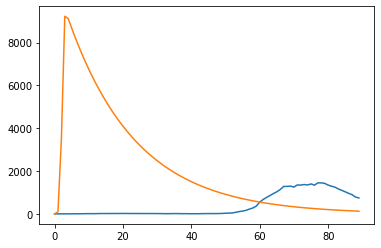

In [228]:
from scipy import integrate

def lossFunc(point, data, recovered, si, ii , ri):
    beta, gamma = point
    size = len(data)
    def SIR(t,y):
        S,I,R = y

        dSdt = -beta*S*I
        dIdt = beta*S*I - gamma*I
        dRdt = gamma*I
        return [dSdt, dIdt, dRdt]

    sol = integrate.solve_ivp(SIR, (0,size), (10000,2,10), t_eval=np.arange(0,size,1), vectorized=True )
    print(sol.y[1].shape)
    print(data.shape)
    l1= np.sqrt(np.mean(sol.y[1]-data)**2)
    l2= np.sqrt(np.mean(sol.y[2]-recovered)**2)
    alpha = 0.7
    a = alpha*l1+(1-alpha)*l2
    return a
print('error = ',a)

print(sol.y[1])
print(data)

plt.plot(x, data)
plt.plot(x,sol.y[1])

In [200]:
from scipy.optimize import minimize

optimal = minimize(lossFunc, [0.001, 0.001], args=(data, recovered, si, ii, ri), method='L-BFGS-B', bounds = [(0.00000001,0.4),(0.00000001,0.4)])
print(optimal)
print(optimal.x)


(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,)
(90,

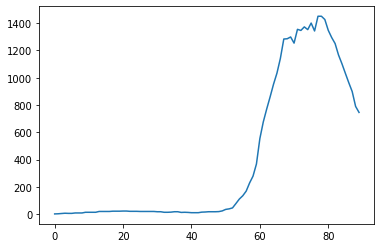

In [243]:
# compare
# beta = optimal.x[0]
# gamma = optimal.x[1]

beta = 0.0001
gamma = 0.001


def SIR(y,t):
    S,I,R = y
    dSdt = -beta*S*I
    dIdt = beta*S*I - gamma*I
    dRdt = gamma*I
    return [dSdt, dIdt, dRdt]
y0  = (si, ii, ri)
y = odeint(SIR,y0,t)
# sol = integrate.solve_ivp(SIR, (0,size), (10000,2,10), t_eval=np.arange(0,size,1), vectorized=True )
# dif = y[:,1] - data
# dif

x = np.arange(0,size,1)
# plt.plot(x,y[:,1])
plt.plot(x,data)

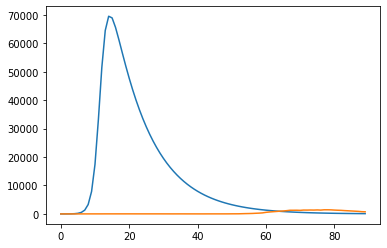

In [226]:
import matplotlib.pyplot as plt
x = np.arange(0,size,1)
plt.plot(x,y[:,1])
plt.plot(x,data)

In [222]:
x = np.arange(22)

In [174]:
res = minimize(rosen, x0, method='BFGS', jac=rosen_der,
               options={'gtol': 1e-6, 'disp': True})

res.x
print(res.message)
res.hess_inv

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.


array([[0.00763624, 0.0125159 , 0.02359808, 0.0465684 , 0.09317974],
       [0.0125159 , 0.02489687, 0.04727754, 0.09353774, 0.18708048],
       [0.02359808, 0.04727754, 0.09483095, 0.18783847, 0.37561493],
       [0.0465684 , 0.09353774, 0.18783847, 0.37715312, 0.75414172],
       [0.09317974, 0.18708048, 0.37561493, 0.75414172, 1.51296479]])